In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
df = pd.read_csv('amazon_sales_data 2025.csv')

# 查看数据集的基本信息
print("数据集基本信息：")
print(df.info())

# 查看数据集的前几行
print("\n数据集前几行：")
print(df.head())

数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      249 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB
None

数据集前几行：
  Order ID       Date        Product     Category  Price  Quantity  \
0  ORD0001  2014/3/25  Running Shoes     Footwear     60         3   
1  ORD0002  2020/3/25     Headphones  Electronics    100         4   


In [2]:
# 检查缺失值情况
print("\n缺失值情况：")
print(df.isnull().sum())

# 处理缺失值，例如用众数填充Customer Location的缺失值
df['Customer Location'].fillna(df['Customer Location'].mode()[0], inplace=True)


缺失值情况：
Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        1
Customer Location    0
Payment Method       0
Status               0
dtype: int64


In [3]:
# 检查重复值情况
print("\n重复值情况：")
print(df.duplicated().sum())

# 删除重复值
df.drop_duplicates(inplace=True)


重复值情况：
0


C:\Users\arili\AppData\Local\Temp\ipykernel_21568\1255508124.py:2: UserWarning: Parsing dates in %Y/%m/%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)



数值型列的描述性统计：
             Price    Quantity  Total Sales
count   250.000000  250.000000   250.000000
mean    343.580000    2.856000   975.380000
std     380.635808    1.429489  1252.112254
min      15.000000    1.000000    15.000000
25%      40.000000    2.000000   100.000000
50%     150.000000    3.000000   400.000000
75%     600.000000    4.000000  1500.000000
max    1200.000000    5.000000  6000.000000


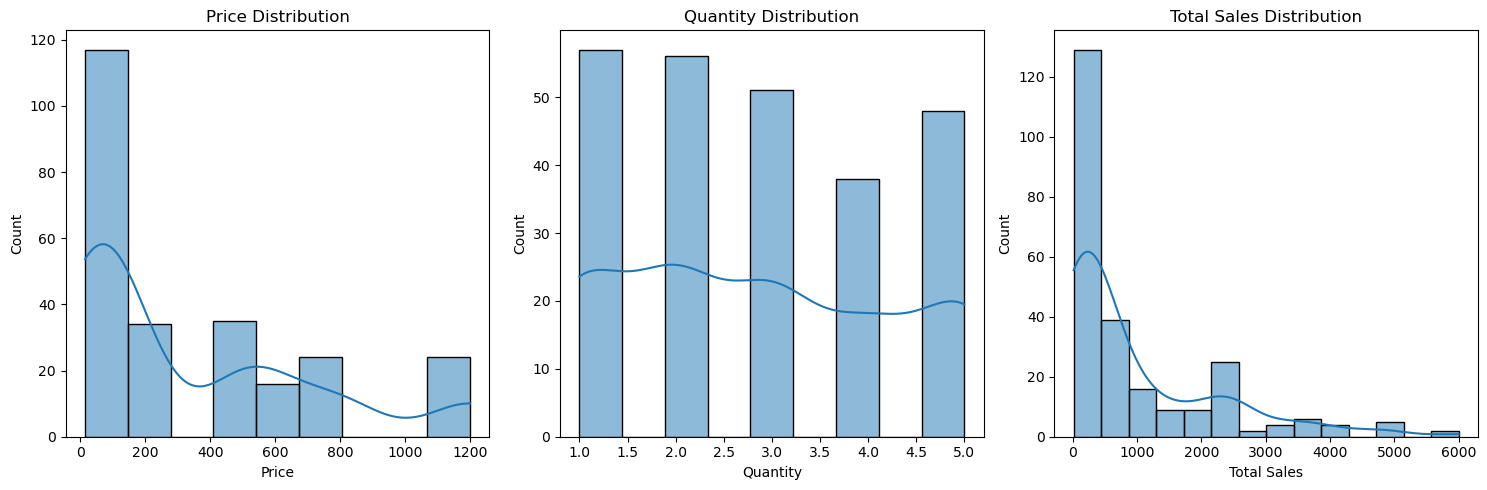

In [4]:
# 将Date列转换为日期格式
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# 对数值型列进行描述性统计
print("\n数值型列的描述性统计：")
print(df[['Price', 'Quantity', 'Total Sales']].describe())

# 绘制数值型列的分布图
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Quantity'], kde=True)
plt.title('Quantity Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Total Sales'], kde=True)
plt.title('Total Sales Distribution')

plt.tight_layout()
plt.show()

缺失值比例（%）：
Order ID             0.0
Date                 0.0
Product              0.0
Category             0.0
Price                0.0
Quantity             0.0
Total Sales          0.0
Customer Name        0.4
Customer Location    0.0
Payment Method       0.0
Status               0.0
dtype: float64

重复值比例（%）：
0.0

Status列的唯一值：
['Cancelled' 'Pending' 'Completed']

Order ID列的唯一值数量：
250


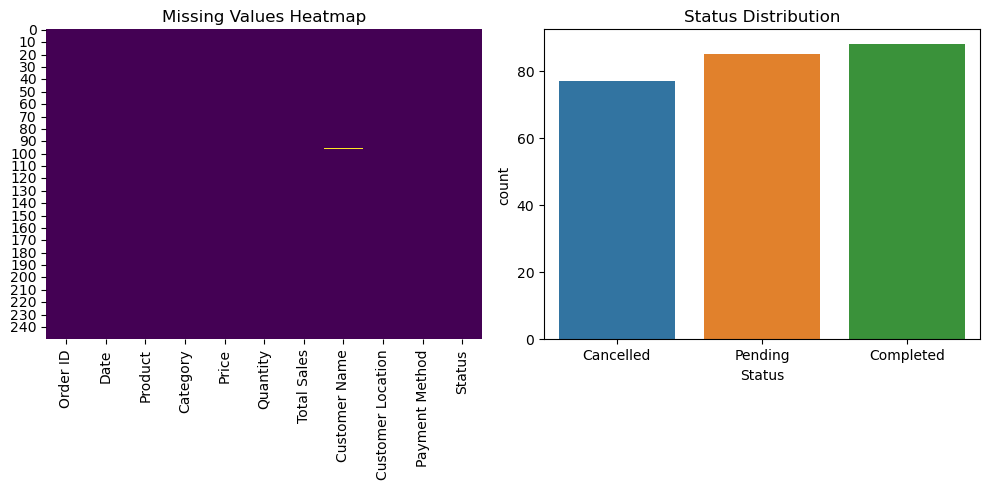

In [5]:
# 计算缺失值比例
missing_values = df.isnull().mean() * 100
print("缺失值比例（%）：")
print(missing_values)

# 计算重复值比例
duplicate_percentage = df.duplicated().mean() * 100
print("\n重复值比例（%）：")
print(duplicate_percentage)

# 检查数据一致性，例如Status列的唯一值
print("\nStatus列的唯一值：")
print(df['Status'].unique())

# 检查数据唯一性，例如Order ID列的唯一值数量
print("\nOrder ID列的唯一值数量：")
print(df['Order ID'].nunique())

# 绘制数据质量评估的相关图表
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')

plt.subplot(1, 2, 2)
sns.countplot(x=df['Status'])
plt.title('Status Distribution')

plt.tight_layout()
plt.show()

订单状态统计：
Status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64


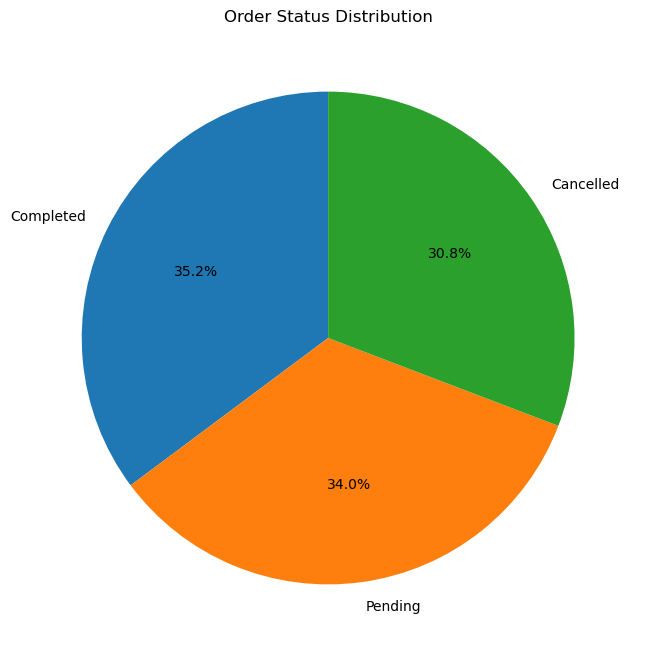

In [6]:
# 订单状态分析
status_counts = df['Status'].value_counts()
print("订单状态统计：")
print(status_counts)

# 绘制订单状态的饼图
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Order Status Distribution')
plt.show()


订单数量最多的前10名客户：
Customer Name
Emma Clark       31
Jane Smith       30
Olivia Wilson    29
David Lee        26
John Doe         26
Michael Brown    24
Daniel Harris    23
Chris White      22
Emily Johnson    22
Sophia Miller    16
Name: count, dtype: int64


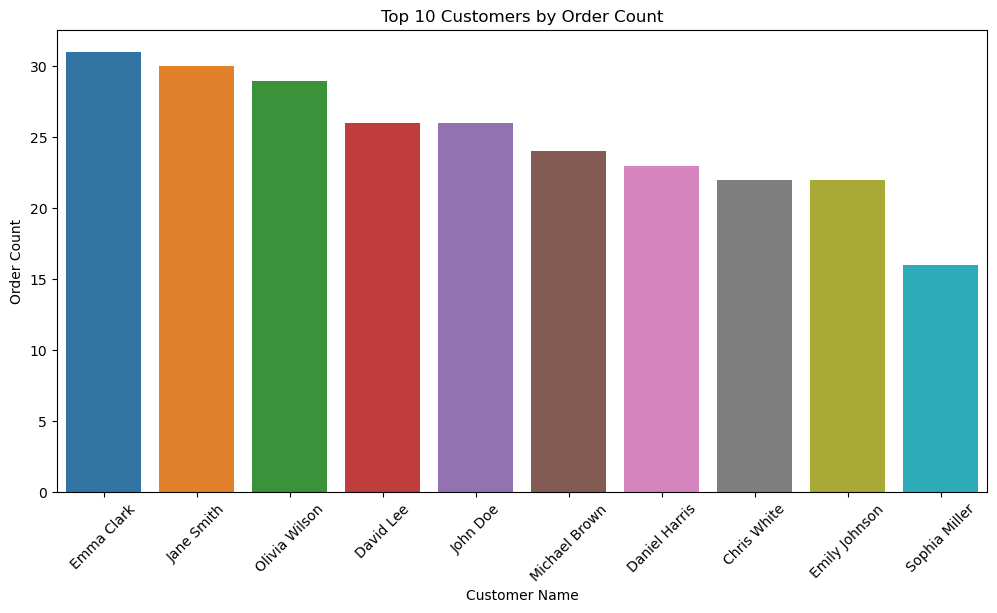

In [7]:
# 客户行为分析 - 按客户名称统计订单数量
customer_order_counts = df['Customer Name'].value_counts().head(10)
print("\n订单数量最多的前10名客户：")
print(customer_order_counts)

# 绘制订单数量最多的前10名客户的柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_order_counts.index, y=customer_order_counts.values)
plt.title('Top 10 Customers by Order Count')
plt.xlabel('Customer Name')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()


按月份统计的销售额：
Month
2    122695
3    117730
4      3420
Name: Total Sales, dtype: int64


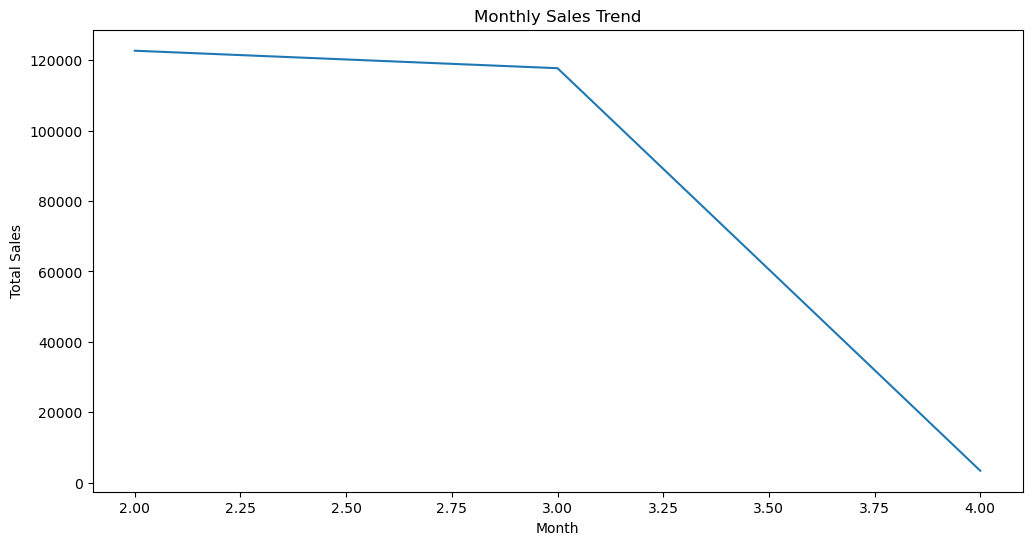

In [8]:
# 产品销售趋势分析 - 按月份统计销售额
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Total Sales'].sum()
print("\n按月份统计的销售额：")
print(monthly_sales)

# 绘制销售额的时间序列图
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


按类别统计的销售额：
Category
Electronics        129950
Home Appliances    105000
Footwear             4320
Clothing             3540
Books                1035
Name: Total Sales, dtype: int64


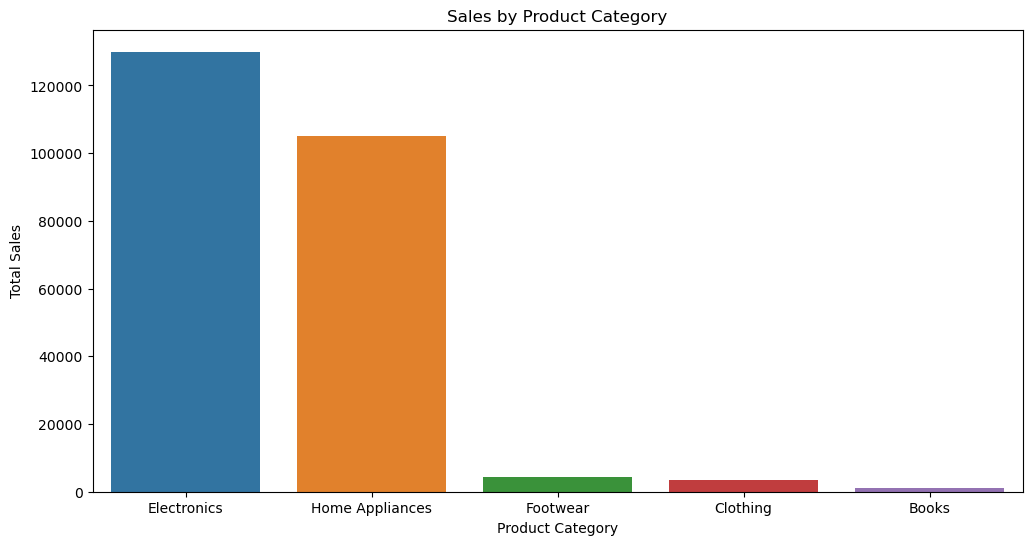

In [9]:
# 产品类别分析 - 按类别统计销售额
category_sales = df.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)
print("\n按类别统计的销售额：")
print(category_sales)

# 绘制不同产品类别的销售柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()


按付款方式统计的销售额：
Payment Method
Amazon Pay     32750
Credit Card    61595
Debit Card     31900
Gift Card      47955
PayPal         69645
Name: Total Sales, dtype: int64


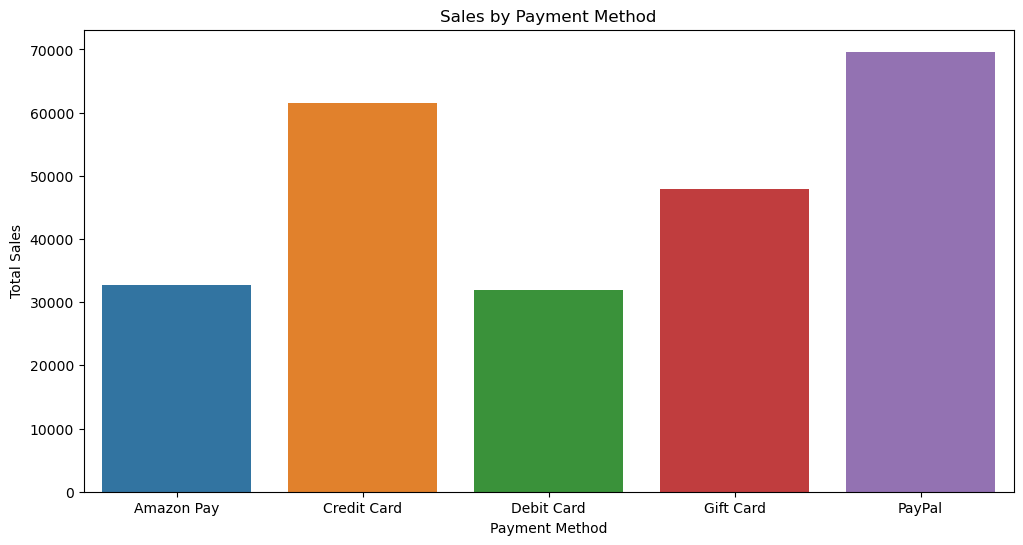

In [10]:
# 付款方式分析 - 按付款方式统计销售额
payment_sales = df.groupby('Payment Method')['Total Sales'].sum()
print("\n按付款方式统计的销售额：")
print(payment_sales)

# 绘制付款方式与销售额的柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x=payment_sales.index, y=payment_sales.values)
plt.title('Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()


销售额最高的前10个客户位置：
Customer Location
Miami            31700
Denver           29785
Houston          28390
Dallas           27145
Seattle          26890
Boston           26170
Chicago          20810
New York         18940
Los Angeles      17820
San Francisco    16195
Name: Total Sales, dtype: int64


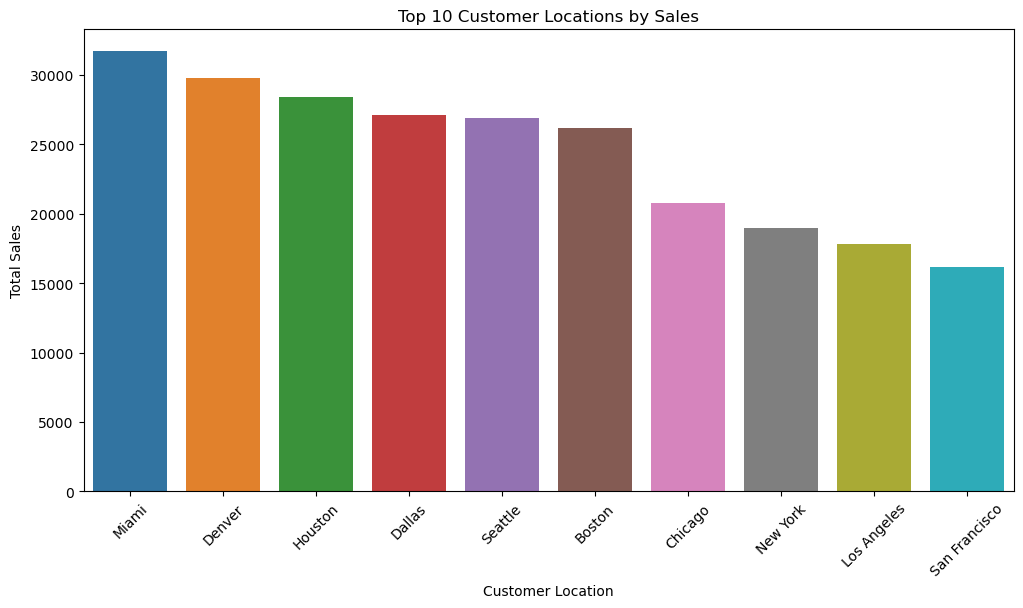

In [11]:
# 客户位置分析 - 按客户位置统计销售额
location_sales = df.groupby('Customer Location')['Total Sales'].sum().sort_values(ascending=False).head(10)
print("\n销售额最高的前10个客户位置：")
print(location_sales)

# 绘制销售额最高的前10个客户位置的柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x=location_sales.index, y=location_sales.values)
plt.title('Top 10 Customer Locations by Sales')
plt.xlabel('Customer Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


变量之间的相关性矩阵：
                Price  Quantity  Total Sales
Price        1.000000 -0.010858     0.846673
Quantity    -0.010858  1.000000     0.332444
Total Sales  0.846673  0.332444     1.000000


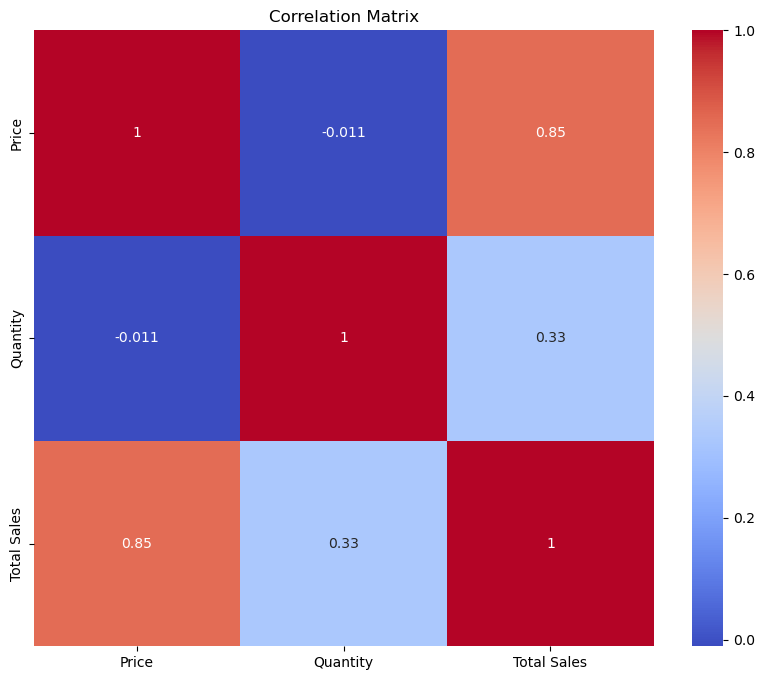

In [12]:
# 相关性分析 - 分析变量之间的相关性
correlation_matrix = df[['Price', 'Quantity', 'Total Sales']].corr()
print("\n变量之间的相关性矩阵：")
print(correlation_matrix)

# 绘制热力图展示相关性
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\arili\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arili\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



聚类结果：
  Customer Name  Cluster  Total Sales  Quantity
0   Chris White        2          180         3
1   Chris White        2          400         4
2   Chris White        0          120         2
3   Chris White        2          180         3
4   Chris White        2          450         3
5   Chris White        0           20         1
6   Chris White        2          600         4
7   Chris White        0          500         1
8   Chris White        2           60         3
9   Chris White        0          500         1


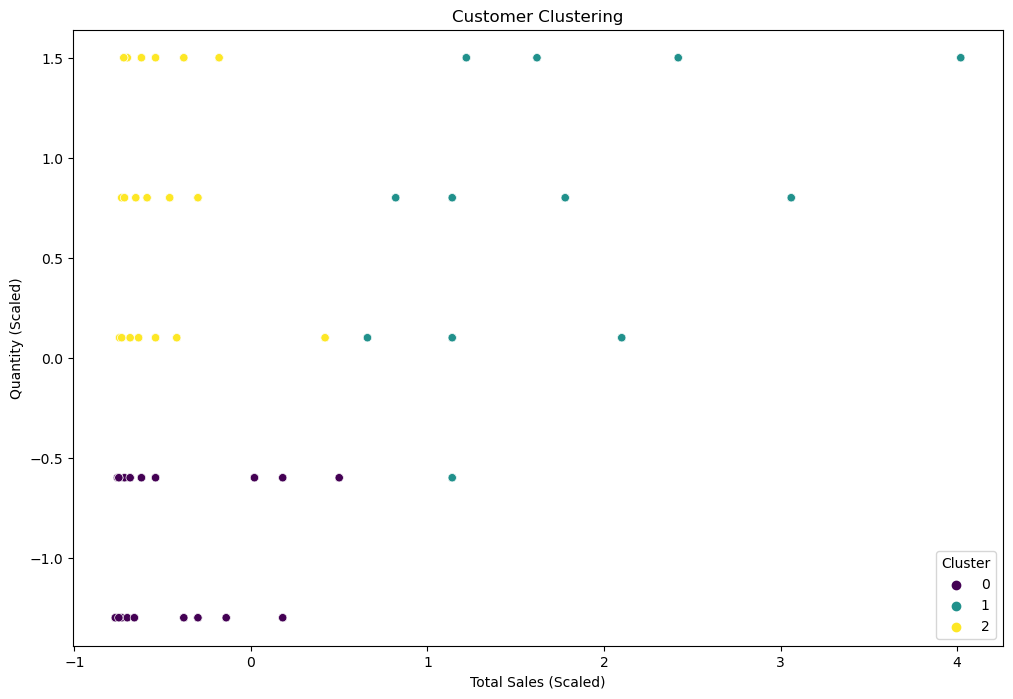

In [13]:
# 导入必要的库
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# 客户行为分析 - 聚类分析
# 选择用于聚类的特征
clustering_features = ['Total Sales', 'Quantity']

# 对特征进行标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[clustering_features])

# 使用KMeans聚类算法
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# 查看聚类结果
print("\n聚类结果：")
print(df[['Customer Name', 'Cluster', 'Total Sales', 'Quantity']].head(10))

# 绘制聚类结果的散点图
plt.figure(figsize=(12, 8))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Clustering')
plt.xlabel('Total Sales (Scaled)')
plt.ylabel('Quantity (Scaled)')
plt.show()


线性回归模型性能：
均方误差 (MSE): 278582.2838226907
R² 分数: 0.6919215489680084


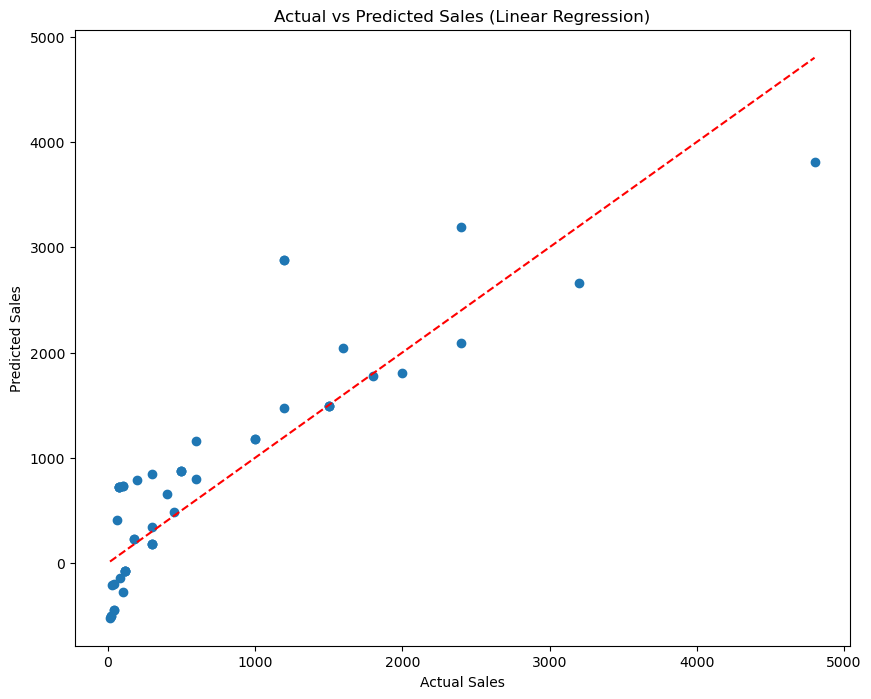

In [14]:
# 产品销售预测 - 线性回归
# 选择特征和目标变量
X = df[['Price', 'Quantity']]
y = df['Total Sales']

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练线性回归模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = lr_model.predict(X_test)

# 评估模型性能
print("\n线性回归模型性能：")
print(f"均方误差 (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"R² 分数: {r2_score(y_test, y_pred)}")

# 绘制实际值与预测值的散点图
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()


决策树分类器性能：
准确率: 0.32


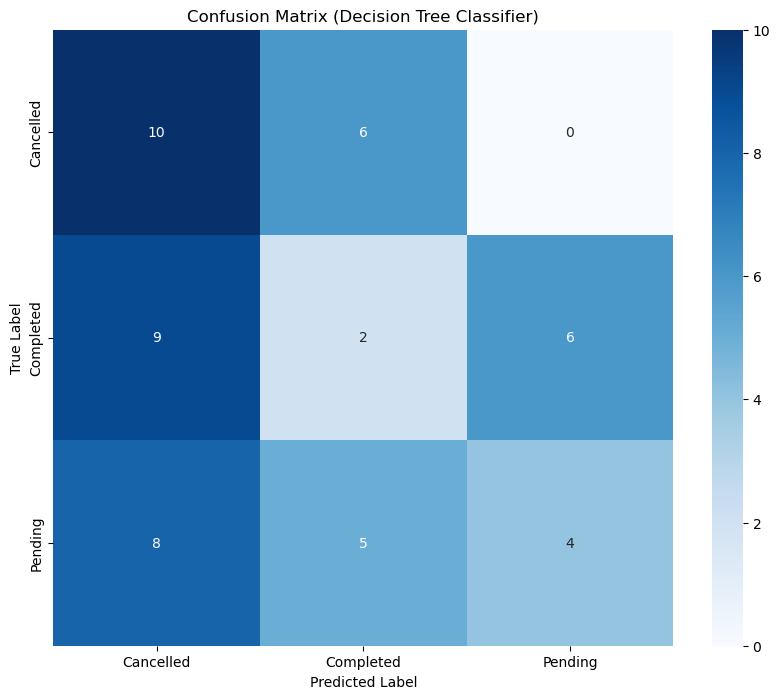

In [15]:
# 订单状态分类 - 决策树分类器
# 对分类变量进行编码
le = LabelEncoder()
df['Status Encoded'] = le.fit_transform(df['Status'])

# 选择特征和目标变量
X_status = df[['Price', 'Quantity', 'Total Sales']]
y_status = df['Status Encoded']

# 分割数据集为训练集和测试集
X_train_status, X_test_status, y_train_status, y_test_status = train_test_split(X_status, y_status, test_size=0.2, random_state=42)

# 训练决策树分类器
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_status, y_train_status)

# 在测试集上进行预测
y_pred_status = dt_model.predict(X_test_status)

# 评估模型性能
print("\n决策树分类器性能：")
print(f"准确率: {accuracy_score(y_test_status, y_pred_status)}")

# 绘制混淆矩阵
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_status, y_pred_status)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Decision Tree Classifier)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()